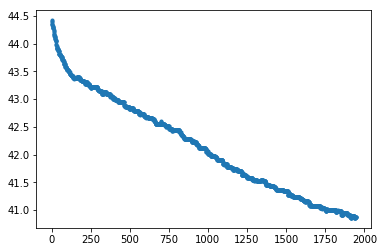

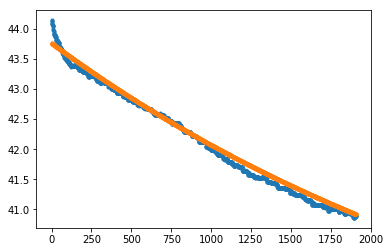

0.0003


In [4]:
ga = 0 #a的猜測值
gb = 10**(-3) #b的猜測值
gc = 40 #c得猜測值
rangeb = 10 #可接受的b範圍
cut = 6 #分割找數據段數

#讀數據
import numpy as np
fp = open('5.txt','r',encoding='UTF-8')
a = []
for line in fp:
    a.append(list(line.strip('\n').split(',')))
b = a[1:]
n = 0
data= []
for x in b:
    x = float(b[n][1][5:10])
    data.append(x)
    n = n+1

#畫數據
import matplotlib.pyplot as plt
import numpy as np
l = len(data)
x = np.linspace(1,l, l)
plt.plot(x, data,'.')
plt.show()
x=np.linspace(1,l,num=l)
np_data = np.array(data)

#定義擬合函數
from scipy import optimize
def func(x, a, b, c):
    return a*np.exp(-b*x)+c

#切數據
b = [] 
for i in range (cut) :
    dataa=np_data[int(l/cut*i):int(l/cut*(i+1))]
    xa=x[int(l/cut*i):int(l/cut*(i+1))]
    popt, pcov = optimize.curve_fit(func, xa, dataa, maxfev=1000000, p0=(ga, gb, gc))
    b.append(popt[1])
    
#把b值好的數據拿出來
index = []
for i in range (cut):
    if((abs(b[i]) < rangeb*gb)and((abs(b[i])>gb/rangeb))):
        index.append(i)
st = int(l/cut*max(0,(min(index)-1)))
end = int(l/cut*min(cut,(max(index)+1)))
datab = np_data[st:end]
xb=np.linspace(1,len(datab),len(datab))

#fit較好的數據
popt, pcov = optimize.curve_fit(func, xb, datab, maxfev=1000000, p0=(ga, gb, gc))

#去頭
datac = datab[int(len(datab)*0.01):]
xc = np.linspace(1, len(datac), len(datac))
popt1, pcov1 = optimize.curve_fit(func, xc, datac, maxfev=1000000, p0=(ga, gb, gc))
datad = datac
while(pcov1[1,1]<pcov[1,1]):
    break
    pcov = pcov1
    datad = datac
    datac = datac[int(len(datac)*0.01):]
    xc = np.linspcace(1, len(datac), len(datac))
    popt1, pcov1 = optimize.curve_fit(func, xc, datac, maxfev=1000000, p0=(ga, gb, gc))

#去尾
datae = datad[:int(len(datad)*0.99)]
xe = np.linspace(1, len(datae), len(datae))
popt1, pcov1 = optimize.curve_fit(func, xe, datae, maxfev=1000000, p0=(ga, gb, gc))
dataf = datae
while(pcov1[1,1]<pcov[1,1]):
    break
    print(5)
    pcov = pcov1
    dataf = datae
    datae = datae[:int(len(datad)*0.99)]
    xe = np.linspace(1, len(datae), len(datae))
    popt1, pcov1 = optimize.curve_fit(func, xe, datae, maxfev=1000000, p0=(ga, gb, gc))

#plot結果    
xf=np.linspace(1,len(dataf),len(dataf))
plt.plot(xf, dataf, '.')
popt1, pcov1 = optimize.curve_fit(func, xf, dataf, maxfev=1000000, p0=(ga, gb, gc))
a=round(popt1[0],4)
b=round(popt1[1],4)
c=round(popt1[2],4)
yvals1 = func(xf,a,b,c)
plt.plot(xf, yvals1,'.')
plt.show()
print(b)